In [64]:
import numpy as np
import time
from geoarray import GeoArray
import scipy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import tkinter
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

In [65]:
data = GeoArray('C:\\Users\\vpatro\\Desktop\\ang20160126\\ang20160126t055327_corr_v2m2_img')
print(data.shape)
print(type(data))

(5618, 704, 425)
<class 'geoarray.baseclasses.GeoArray'>


In [75]:
def remove_bad_bands(spectra: np.array):
    bands = list(range(1,426))
    bands = np.array(bands)
    deeph2o = np.logical_or(np.logical_and(bands > 181, bands < 215), np.logical_and(bands > 275, bands < 325))
    bad_cal = bands > 418
    bad = np.logical_or(deeph2o, bad_cal)
    spectra[bad] = np.nan

# SavGol smoothening function

def savgol_smoothening(spectra_list:list):
    for spectra in spectra_list:
        noise_peak_1 = spectra[105:120].copy()
        noise_peak_2 = spectra[140:165].copy()
        spectra[105:120] = savgol_filter(noise_peak_1, 11,1)
        spectra[140:165] = savgol_filter(noise_peak_2, 21, 1)
        
                       

In [68]:
# is taking about 2 minutes to chop
start_time = time.time()
data = data[50:5501, 150:601, :]
print("--- %s seconds ---" % (time.time() - start_time))

--- 147.68428993225098 seconds ---


In [88]:
start_time = time.time()
svgy_p1 = data[:,:,105:120].copy()
svgy_p1 = svgy_p1.reshape((svgy_p1.shape[0]*svgy_p1.shape[1], svgy_p1.shape[2]))
print("--- %s seconds ---" % (time.time() - start_time))
print(svgy_p1.shape)
start_time = time.time()
svgy_p2 = data[:,:,140:165].copy()
svgy_p2 = svgy_p2.reshape((svgy_p2.shape[0]*svgy_p2.shape[1], svgy_p2.shape[2]))
print("--- %s seconds ---" % (time.time() - start_time))
print(svgy_p2.shape)

--- 0.07778286933898926 seconds ---
(2458401, 15)
--- 0.08690905570983887 seconds ---
(2458401, 25)


In [89]:
start_time = time.time()
svgy_p1 = savgol_filter(svgy_p1, 11, 1, axis = 0)
print("--- %s seconds ---" % (time.time() - start_time))
print(svgy_p1.shape)
start_time = time.time()
svgy_p2 = savgol_filter(svgy_p2, 19, 1, axis = 0)
print("--- %s seconds ---" % (time.time() - start_time))
print(svgy_p2.shape)

--- 0.550344705581665 seconds ---
(2458401, 15)
--- 1.2803630828857422 seconds ---
(2458401, 25)


In [98]:
svgy1_bands = 15
svgy2_bands = 25

In [99]:
start_time = time.time()
svgy_p1 = svgy_p1.reshape(data.shape[0], data.shape[1], svgy1_bands)
data[:,:,105:120] = svgy_p1.copy()
print("--- %s seconds ---" % (time.time() - start_time))
print(svgy_p1.shape)
start_time = time.time()
svgy_p2 = svgy_p2.reshape(data.shape[0], data.shape[1], svgy2_bands)
data[:,:,140:165] = svgy_p2.copy()
print("--- %s seconds ---" % (time.time() - start_time))
print(svgy_p2.shape)

--- 0.1790773868560791 seconds ---
(5451, 451, 15)
--- 0.3744370937347412 seconds ---
(5451, 451, 25)


In [107]:
data.shape

(5451, 451, 425)

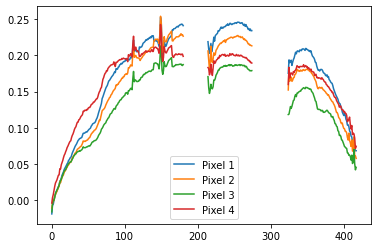

In [108]:
# checking to see if the cleaning worked
for i in range(4):
    spectra = data[np.random.randint(1,5000),np.random.randint(1,400),:]
    remove_bad_bands(spectra)
    plt.plot(spectra, label = 'Pixel ' + str(i+1))
plt.legend()
    
    

In [100]:
# takes no time at all
start_time = time.time()
spectra_list = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0 seconds ---


In [101]:
# clustering takes a little over 3 min
start_time = time.time()
seed = 8
kmeans = KMeans(init='k-means++', n_clusters = 4, n_init=10, random_state=seed).fit(spectra_list)
print("--- %s seconds ---" % (time.time() - start_time))

--- 205.06517839431763 seconds ---


In [102]:
print(type(kmeans.cluster_centers_))
print(type(kmeans.cluster_centers_[0]))
print(kmeans.cluster_centers_[0].shape)
means = kmeans.cluster_centers_
print(means.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(425,)
(4, 425)


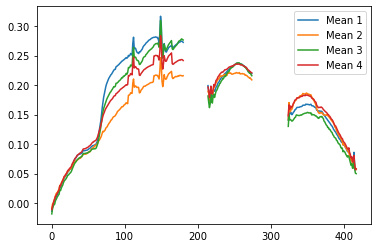

In [105]:
for i in range(means.shape[0]):
    remove_bad_bands(means[i])
    plt.plot(means[i], label = 'Mean ' + str(i+1))
plt.legend()